<a href="https://colab.research.google.com/github/smiling621/ML-practice/blob/main/Soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data=pd.read_csv('/content/FIFA-2019.csv')
df=data[['Name','Age','Wage','Value']]
df


,Name,Age,Wage,Value
0,L. Messi,31,€565K,€110.5M
1,Cristiano Ronaldo,33,€405K,€77M
2,Neymar Jr,26,€290K,€118.5M
3,De Gea,27,€260K,€72M
4,K. De Bruyne,27,€355K,€102M
...,...,...,...,...
18202,J. Lundstram,19,€1K,€60K
18203,N. Christoffersson,19,€1K,€60K
18204,B. Worman,16,€1K,€60K
18205,D. Walker-Rice,17,€1K,€60K


In [3]:
(df['Age']>40).head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [4]:
def value_to_float(x):
    if isinstance(x, int):
        return x  # return as is if already an integer

    # Removeing the Euro symbol and 'K' or 'M' suffix
    if 'K' in x:
        return int(float(x.replace('€','').replace('K', '')) * 1000)
    elif 'M' in x:
        return int(float(x.replace('€', '').replace('M', '')) * 1000000)
    else:
        return int(x.replace('€', ''))
# df['Wage']= df['Wage'].apply(value_to_float)
#Apply the function using loc(pandas method) to avoid settingWithCopyWarning
df.loc[:, 'Wage'] = df['Wage'].apply(value_to_float)
df.loc[:, 'Value'] = df['Value'].apply(value_to_float)
# below values are still euro amount, because we just removed the euro sign and suffixes

In [5]:
df.head()

,Name,Age,Wage,Value
0,L. Messi,31,565000,110500000
1,Cristiano Ronaldo,33,405000,77000000
2,Neymar Jr,26,290000,118500000
3,De Gea,27,260000,72000000
4,K. De Bruyne,27,355000,102000000


In [6]:
def value_to_float(x):
    if isinstance(x, int):
        return x  # return as is if already an integer

    # Removeing the Euro symbol and 'K' or 'M' suffix
    if 'K' in x:
        return int(float(x.replace('€','').replace('K', '')) * 1000)
    elif 'M' in x:
        return int(float(x.replace('€', '').replace('M', '')) * 1000000)
    else:
        return int(x.replace('€', ''))
# df['Wage']= df['Wage'].apply(value_to_float)
 #df['Wage']= df['Wage'].apply(value_to_float)
#Apply the function using loc(pandas method) to avoid settingWithCopyWarning
df.loc[:, 'Wage'] = df['Wage'].apply(value_to_float)
df.loc[:, 'Value'] = df['Value'].apply(value_to_float)
# below values are still euro amount, because we just removed the euro sign and suffixes

In [7]:
df.head()

,Name,Age,Wage,Value
0,L. Messi,31,565000,110500000
1,Cristiano Ronaldo,33,405000,77000000
2,Neymar Jr,26,290000,118500000
3,De Gea,27,260000,72000000
4,K. De Bruyne,27,355000,102000000


Clustering

<Axes: xlabel='Wage', ylabel='Value'>

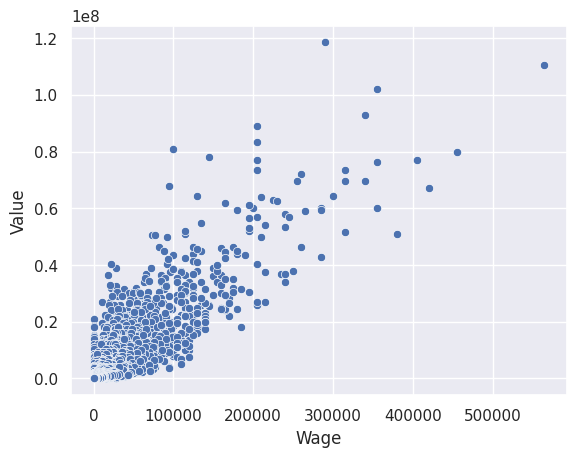

In [8]:
import seaborn as sns
sns.set()
graph=sns.scatterplot(x='Wage',y='Value',data=df)
graph

In [9]:
!pip install bokeh

In [22]:
from bokeh.plotting import figure,show, output_notebook
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource

In [23]:
output_notebook()

In [24]:
p = figure(title = 'Soccer 2019',x_axis_label = 'Wage',y_axis_label = 'Value')
p.scatter('Wage','Value',source = df,size = 1)
show (p)

In [25]:
TOOL = HoverTool(tooltips =[
    ('index' ,'$index'),
    ("(Wage,Vlaue)" ,"(@Wage,@Value)"),
    ("Name",'@Name')])

In [27]:
p = figure(title = 'Soccer 2019',x_axis_label = 'Wage',y_axis_label = 'Value',tools=[TOOL])
p.circle('Wage','Value',source = df,size = 2)
show (p)